## DATA 602 - FINAL PROJECT

### MOVING VIOLATIONS ISSUED IN SEPTEMBER 2021 IN D.C

#### Objective: 
Traffic violations are one of the major concerns in any part of the world. Understanding this data will help and taking necessary actions will help achieve significant reduction in the number of road accidents in the future. My objective is to understand and estimate the reasons behind the most repeated violations which are causing road accidents and help reduce them.

### Data Set Description:
This data contains 70458 entries for the month of september,2021. It has 35 columns and 70458 rows.
This data is avialabe for public usage in open D.C data website(https://opendata.dc.gov/datasets/) and there are no permissions required to access it.
This data contains information regarding the vehicle make, type of violation, accident indicator, the agency that has booked the violation etc.,


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve

In [2]:
df1=pd.read_csv('Moving_Violations_Issued_in_September_2021.csv')

/Users/jaswanthsai/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df1.shape

(70458, 35)

In [4]:
print("Total number of rows are: {} \nTotal number of columns are: {}".format(df1.shape[0],df1.shape[1]))

Total number of rows are: 70458 
Total number of columns are: 35


In [5]:
# To display all the columns while printing the dataframe
pd.set_option('display.max_columns',None)

In [6]:
df1.head()

,OBJECTID,TICKET_NUMBER,VIOLATION_TYPE_DESC,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,LOCATION,PLATE_STATE,ACCIDENT_INDICATOR,DISPOSITION_CODE,DISPOSITION_TYPE,DISPOSITION_DATE,FINE_AMOUNT,TOTAL_PAID,PENALTY_1,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,RP_MULT_OWNER_NO,BODY_STYLE,XCOORD,YCOORD,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM,DRV_LIC_STATE,DOB_YEAR,VEH_YEAR,VEH_MAKE
0,33562749,264174621,M,2021/09/06 04:00:00+00,NaN,1,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T185,MAKING A TURN FROM THE WRONG LANE,79 POTOMAC AVE SE,VA,Y,106.0,Dismissed,2021/09/25 04:00:00+00,100,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399407.410,133724.670,38.871,-77.007,313299.0,2021/10/12 21:19:57+00,VA,1978.0,NaN,HOND
1,33562755,275204086,M,2021/09/01 04:00:00+00,NaN,22,UNITED STATES PARK POLICE,USPP,T059,CHANGE LANES WITHOUT CAUTION,SOUTH CAPITAL AND K ST SE,TN,Y,106.0,Dismissed,2021/09/22 04:00:00+00,100,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399213.581,134508.882,38.878,-77.009,900005.0,2021/10/12 21:19:57+00,FL,1989.0,NaN,NISS
2,33563016,276586321,M,2021/09/08 04:00:00+00,NaN,23,UNITED STATES CAPITOL POLICE,USCP,T654,VIOLATION OF ONE WAY STREET RESTRICTION,D ST EXIT 395 N SW,VA,Y,NaN,Other,NaN,100,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021/10/12 21:19:57+00,VA,1999.0,NaN,VOLV
3,33563017,276586332,M,2021/09/08 04:00:00+00,NaN,23,UNITED STATES CAPITOL POLICE,USCP,T711,OWNER OPERATE OR PERMIT OPERATION OF UNINSRD VEH,P ST EXIT OFF 395 N SW,VA,Y,NaN,Other,NaN,500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021/10/12 21:19:57+00,VA,1999.0,NaN,VOLV
4,33563018,276586343,M,2021/09/08 04:00:00+00,NaN,23,UNITED STATES CAPITOL POLICE,USCP,T333,FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE,P ST EXIT OFF 395 N SW,VA,Y,NaN,Other,NaN,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021/10/12 21:19:57+00,VA,1999.0,NaN,VOLV


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70458 entries, 0 to 70457
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OBJECTID                70458 non-null  int64  
 1   TICKET_NUMBER           70458 non-null  object 
 2   VIOLATION_TYPE_DESC     70458 non-null  object 
 3   ISSUE_DATE              70458 non-null  object 
 4   ISSUE_TIME              0 non-null      float64
 5   ISSUING_AGENCY_CODE     70458 non-null  int64  
 6   ISSUING_AGENCY_NAME     70458 non-null  object 
 7   ISSUING_AGENCY_SHORT    70458 non-null  object 
 8   VIOLATION_CODE          70458 non-null  object 
 9   VIOLATION_PROCESS_DESC  70458 non-null  object 
 10  LOCATION                70454 non-null  object 
 11  PLATE_STATE             70458 non-null  object 
 12  ACCIDENT_INDICATOR      2509 non-null   object 
 13  DISPOSITION_CODE        113 non-null    float64
 14  DISPOSITION_TYPE        70458 non-null

In [8]:
df1.dtypes

OBJECTID                    int64
TICKET_NUMBER              object
VIOLATION_TYPE_DESC        object
ISSUE_DATE                 object
ISSUE_TIME                float64
ISSUING_AGENCY_CODE         int64
ISSUING_AGENCY_NAME        object
ISSUING_AGENCY_SHORT       object
VIOLATION_CODE             object
VIOLATION_PROCESS_DESC     object
LOCATION                   object
PLATE_STATE                object
ACCIDENT_INDICATOR         object
DISPOSITION_CODE          float64
DISPOSITION_TYPE           object
DISPOSITION_DATE           object
FINE_AMOUNT                 int64
TOTAL_PAID                  int64
PENALTY_1                 float64
PENALTY_2                 float64
PENALTY_3                 float64
PENALTY_4                 float64
PENALTY_5                 float64
RP_MULT_OWNER_NO          float64
BODY_STYLE                float64
XCOORD                    float64
YCOORD                    float64
LATITUDE                  float64
LONGITUDE                 float64
MAR_ID        

## Data Cleaning

In [9]:
df = df1.replace(r'^\s*$',np.nan, regex=True)

#### Finding out the nulls in each column

In [10]:
df.isnull().sum()

OBJECTID                      0
TICKET_NUMBER                 0
VIOLATION_TYPE_DESC           0
ISSUE_DATE                    0
ISSUE_TIME                70458
ISSUING_AGENCY_CODE           0
ISSUING_AGENCY_NAME           0
ISSUING_AGENCY_SHORT          0
VIOLATION_CODE                0
VIOLATION_PROCESS_DESC        0
LOCATION                      4
PLATE_STATE               67989
ACCIDENT_INDICATOR        67949
DISPOSITION_CODE          70345
DISPOSITION_TYPE              0
DISPOSITION_DATE          70345
FINE_AMOUNT                   0
TOTAL_PAID                    0
PENALTY_1                 70458
PENALTY_2                 70458
PENALTY_3                 70458
PENALTY_4                 70458
PENALTY_5                 70458
RP_MULT_OWNER_NO          69111
BODY_STYLE                70458
XCOORD                    15746
YCOORD                    15746
LATITUDE                  15746
LONGITUDE                 15746
MAR_ID                    15746
GIS_LAST_MOD_DTTM             0
DRV_LIC_

#### Dropping columns that are empty and can't be imputed

In [11]:
df.drop(['LOCATION','XCOORD','YCOORD','ISSUE_DATE','ISSUE_TIME', 'PENALTY_1','PENALTY_2','PENALTY_3','PENALTY_4','PENALTY_5','BODY_STYLE','DISPOSITION_CODE','DISPOSITION_DATE','RP_MULT_OWNER_NO','MAR_ID','DOB_YEAR','VEH_YEAR'], axis = 1,inplace = True)

In [12]:
df[df.columns[df.isna().any()]]

,PLATE_STATE,ACCIDENT_INDICATOR,LATITUDE,LONGITUDE,DRV_LIC_STATE,VEH_MAKE
0,VA,Y,38.871,-77.007,VA,HOND
1,TN,Y,38.878,-77.009,FL,NISS
2,VA,Y,NaN,NaN,VA,VOLV
3,VA,Y,NaN,NaN,VA,VOLV
4,VA,Y,NaN,NaN,VA,VOLV
...,...,...,...,...,...,...
70453,NaN,NaN,38.909,-76.938,NaN,HOND
70454,NaN,NaN,38.912,-76.996,NaN,BUIC
70455,NaN,NaN,38.956,-76.991,NaN,CHEV
70456,NaN,NaN,38.924,-77.073,NaN,KIA


#### Interpolating the latitude and longitude for visualisation purpose

In [13]:
cols = ['LATITUDE', 'LONGITUDE']
df[cols] = df[cols].ffill()

In [14]:
df.isnull().sum()

OBJECTID                      0
TICKET_NUMBER                 0
VIOLATION_TYPE_DESC           0
ISSUING_AGENCY_CODE           0
ISSUING_AGENCY_NAME           0
ISSUING_AGENCY_SHORT          0
VIOLATION_CODE                0
VIOLATION_PROCESS_DESC        0
PLATE_STATE               67989
ACCIDENT_INDICATOR        67949
DISPOSITION_TYPE              0
FINE_AMOUNT                   0
TOTAL_PAID                    0
LATITUDE                      0
LONGITUDE                     0
GIS_LAST_MOD_DTTM             0
DRV_LIC_STATE             59175
VEH_MAKE                     34
dtype: int64

#### Imputing Accident Indicator

In [15]:
df.VIOLATION_CODE.value_counts()

T119    47062
T120    10722
T113     3469
T128     2571
T121     2315
        ...  
T525        1
T760        1
T670        1
T751        1
T106        1
Name: VIOLATION_CODE, Length: 136, dtype: int64

In [16]:
pd.set_option('display.max_rows',None)

In [17]:
df1 = pd.DataFrame(df.groupby(['VIOLATION_CODE','ACCIDENT_INDICATOR']).size())
df1

0
VIOLATION_CODE ACCIDENT_INDICATOR     
T005           N                    21
               Y                    11
T008           N                     6
               Y                     8
T011           N                    12
T012           Y                     1
T013           N                    70
               Y                    49
T018           N                     7
               Y                     3
T019           N                     9
T043           N                    24
               Y                    11
T048           N                     4
T050           N                     3
T051           N                     2
T058           N                    38
               Y                    12
T059           N                    22
               Y                     9
T065           N                    17
T071           N                     3
T080           N                    38
               Y                     2
T082           N                    56
               Y                     3
T083           N                     4
               Y                     1
T088           N                     1
               Y                     1
T095           N                     2
T096           N                     1
T101           N                     3
               Y                     2
T106           Y                     1
T107           N                    26
               Y                    22
T108           N                     2
T109           Y                     1
T112           N                   180
T113           N                    99
T114           N                     3
T115           N                    14
T116           N                    22
T118           N                     9
T119           N                    71
T120           N                   162
T121           N                    50
T124           N                     6
T125           N                     8
               Y                     1
T126           N                     1
T127           N                    16
T128           N                   132
T150           N                    25
T151           N                     6
T167           N                    11
T178           N                     3
T181           N                     2
               Y                     2
T183           N                    41
T184           N                    26
               Y                     2
T185           N                    23
               Y                     1
T192           N                     2
T200           N                     6
               Y                     1
T201           N                     2
T202           N                    11
T205           N                     3
T206           N                    14
               Y                     2
T210           N                    10
               Y                     4
T214           Y                     2
T216           N                     1
T217           N                     1
T218           N                     1
T219           N                     2
               Y                     2
T224           N                     1
               Y                     1
T225           N                     2
T227           N                     8
T247           N                    27
T266           N                     6
T268           N                     1
T280           N                     1
T287           N                     2
T333           N                   134
               Y                    27
T334           N                     2
T335           N                    13
               Y                    15
T339           N                     1
T347           N                     1
T362           N                     1
T363           N                     4
T400           N                    21
T404           N                    36
               Y    

In [18]:
#From the above table it looks like all of the missing value for I for the specific violation code is does not indicate Accident so filling it with NO
df.ACCIDENT_INDICATOR = df.ACCIDENT_INDICATOR.fillna('N')

In [19]:
df.isnull().sum()

OBJECTID                      0
TICKET_NUMBER                 0
VIOLATION_TYPE_DESC           0
ISSUING_AGENCY_CODE           0
ISSUING_AGENCY_NAME           0
ISSUING_AGENCY_SHORT          0
VIOLATION_CODE                0
VIOLATION_PROCESS_DESC        0
PLATE_STATE               67989
ACCIDENT_INDICATOR            0
DISPOSITION_TYPE              0
FINE_AMOUNT                   0
TOTAL_PAID                    0
LATITUDE                      0
LONGITUDE                     0
GIS_LAST_MOD_DTTM             0
DRV_LIC_STATE             59175
VEH_MAKE                     34
dtype: int64

#### We are going to update driving license state(DRV_LIC_STATE)
It was hard to build on with the existing data so we are assuming that the empty columns took their license from the same state they took their car from

In [20]:
df.DRV_LIC_STATE = df.DRV_LIC_STATE.fillna(value=df.PLATE_STATE)

In [21]:
df.isnull().sum()

OBJECTID                      0
TICKET_NUMBER                 0
VIOLATION_TYPE_DESC           0
ISSUING_AGENCY_CODE           0
ISSUING_AGENCY_NAME           0
ISSUING_AGENCY_SHORT          0
VIOLATION_CODE                0
VIOLATION_PROCESS_DESC        0
PLATE_STATE               67989
ACCIDENT_INDICATOR            0
DISPOSITION_TYPE              0
FINE_AMOUNT                   0
TOTAL_PAID                    0
LATITUDE                      0
LONGITUDE                     0
GIS_LAST_MOD_DTTM             0
DRV_LIC_STATE             59023
VEH_MAKE                     34
dtype: int64

#### Imputing vehicle make with the most common makes

In [22]:
df['VEH_MAKE'].fillna(df['VEH_MAKE'].mode()[0], inplace = True)

In [23]:
df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean.head()

,OBJECTID,TICKET_NUMBER,VIOLATION_TYPE_DESC,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,DISPOSITION_TYPE,FINE_AMOUNT,TOTAL_PAID,LATITUDE,LONGITUDE,GIS_LAST_MOD_DTTM,DRV_LIC_STATE,VEH_MAKE
0,33562749,264174621,M,1,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T185,MAKING A TURN FROM THE WRONG LANE,VA,Y,Dismissed,100,100,38.871,-77.007,2021/10/12 21:19:57+00,VA,HOND
1,33562755,275204086,M,22,UNITED STATES PARK POLICE,USPP,T059,CHANGE LANES WITHOUT CAUTION,TN,Y,Dismissed,100,0,38.878,-77.009,2021/10/12 21:19:57+00,FL,NISS
2,33563016,276586321,M,23,UNITED STATES CAPITOL POLICE,USCP,T654,VIOLATION OF ONE WAY STREET RESTRICTION,VA,Y,Other,100,0,38.878,-77.009,2021/10/12 21:19:57+00,VA,VOLV
3,33563017,276586332,M,23,UNITED STATES CAPITOL POLICE,USCP,T711,OWNER OPERATE OR PERMIT OPERATION OF UNINSRD VEH,VA,Y,Other,500,0,38.878,-77.009,2021/10/12 21:19:57+00,VA,VOLV
4,33563018,276586343,M,23,UNITED STATES CAPITOL POLICE,USCP,T333,FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE,VA,Y,Other,30,0,38.878,-77.009,2021/10/12 21:19:57+00,VA,VOLV


#### imputing missing vehicle year from random interpolation method

In [24]:
df_clean.isnull().sum()

OBJECTID                  0
TICKET_NUMBER             0
VIOLATION_TYPE_DESC       0
ISSUING_AGENCY_CODE       0
ISSUING_AGENCY_NAME       0
ISSUING_AGENCY_SHORT      0
VIOLATION_CODE            0
VIOLATION_PROCESS_DESC    0
PLATE_STATE               0
ACCIDENT_INDICATOR        0
DISPOSITION_TYPE          0
FINE_AMOUNT               0
TOTAL_PAID                0
LATITUDE                  0
LONGITUDE                 0
GIS_LAST_MOD_DTTM         0
DRV_LIC_STATE             0
VEH_MAKE                  0
dtype: int64

Data cleaning process is completed we can proceed with data visualization and classification analysis

## DATA VISUALIZATION

#### Correlation Matrix for the data frame

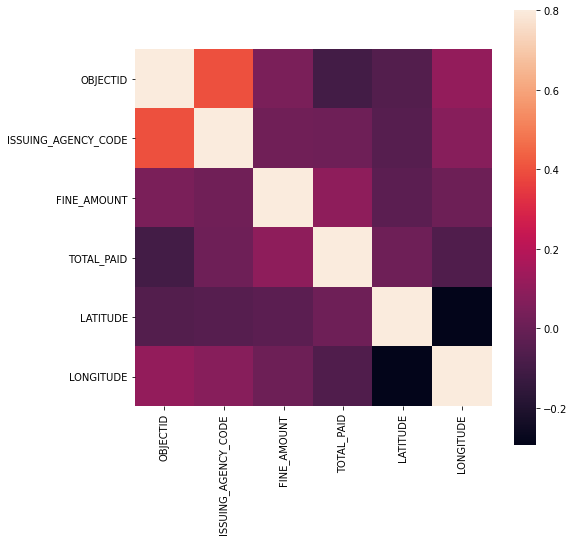

In [25]:
#visualization of correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

#### Column by column analysis

In [26]:
rate_of_accidents = df['ACCIDENT_INDICATOR'].value_counts()
print(rate_of_accidents)

N    70202
Y      256
Name: ACCIDENT_INDICATOR, dtype: int64


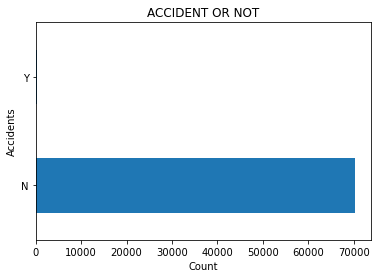

In [27]:
rate_of_accidents.plot(kind='barh')
plt.title('ACCIDENT OR NOT')
plt.ylabel('Accidents')
plt.xlabel('Count')
plt.show()

In [28]:
rate_of_accidents = rate_of_accidents['Y']/rate_of_accidents.sum()
print(f'rate_of_accidents: {rate_of_accidents:.2%}')

rate_of_accidents: 0.36%


As violations that are causing accidents are only 0.36 percent this is the reason why in the graph you are not able to see a barh for 'Y'

#### Finding the count of which state drivers commited most of the violations

In [29]:
unique_values_dl = df['DRV_LIC_STATE'].nunique()
print('Total Number of drivers who were caught violating the law:',unique_values_dl)

Total Number of drivers who were caught violating the law: 46


#### Visualizing to find out which plate state cars have most number of violations 

In [30]:
count_values_dl = df['PLATE_STATE'].value_counts()
count_values_dl

MD    825
DC    710
VA    648
TX     46
PA     31
FL     26
DE     18
NC     17
GA     16
NY     13
NJ     12
CA     11
UN      9
WV      8
AZ      8
SC      7
TN      6
LA      5
IN      5
AR      4
XX      4
MT      4
US      3
MA      3
IL      3
NO      3
AK      2
MN      2
MO      2
MI      2
CT      2
OH      2
OK      2
WI      2
MS      1
SD      1
KS      1
WA      1
YY      1
AL      1
NE      1
NH      1
Name: PLATE_STATE, dtype: int64

Text(0, 0.5, 'Frequency')

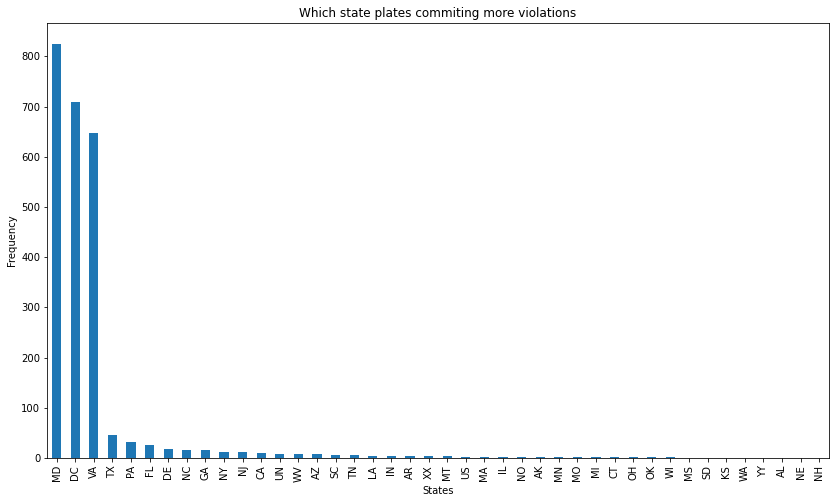

In [31]:
ax = df['PLATE_STATE'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Which state plates commiting more violations")
ax.set_xlabel("States")
ax.set_ylabel("Frequency")

#### Fine amount calculation to total amount of fine paid by the violators in the month of september

In [32]:
df['DUES'] = df['FINE_AMOUNT'] - df['TOTAL_PAID']
df.head()

,OBJECTID,TICKET_NUMBER,VIOLATION_TYPE_DESC,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,DISPOSITION_TYPE,FINE_AMOUNT,TOTAL_PAID,LATITUDE,LONGITUDE,GIS_LAST_MOD_DTTM,DRV_LIC_STATE,VEH_MAKE,DUES
0,33562749,264174621,M,1,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T185,MAKING A TURN FROM THE WRONG LANE,VA,Y,Dismissed,100,100,38.871,-77.007,2021/10/12 21:19:57+00,VA,HOND,0
1,33562755,275204086,M,22,UNITED STATES PARK POLICE,USPP,T059,CHANGE LANES WITHOUT CAUTION,TN,Y,Dismissed,100,0,38.878,-77.009,2021/10/12 21:19:57+00,FL,NISS,100
2,33563016,276586321,M,23,UNITED STATES CAPITOL POLICE,USCP,T654,VIOLATION OF ONE WAY STREET RESTRICTION,VA,Y,Other,100,0,38.878,-77.009,2021/10/12 21:19:57+00,VA,VOLV,100
3,33563017,276586332,M,23,UNITED STATES CAPITOL POLICE,USCP,T711,OWNER OPERATE OR PERMIT OPERATION OF UNINSRD VEH,VA,Y,Other,500,0,38.878,-77.009,2021/10/12 21:19:57+00,VA,VOLV,500
4,33563018,276586343,M,23,UNITED STATES CAPITOL POLICE,USCP,T333,FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE,VA,Y,Other,30,0,38.878,-77.009,2021/10/12 21:19:57+00,VA,VOLV,30


#### TOTAL TRAFFIC VIOLATION DUES FOR THE MONTH OF SEPTEMBER IN D.C AREA

In [33]:
outstanding_dues = df['DUES'].sum()
print("The total outstanding dues to the D.C state:{}$".format(outstanding_dues))

The total outstanding dues to the D.C state:8289886$


#### TOP TEN MOST FREQUENT TYPES OF VIOLATION IN DC AREA

<AxesSubplot:title={'center':'Top Ten Most Common Violations'}>

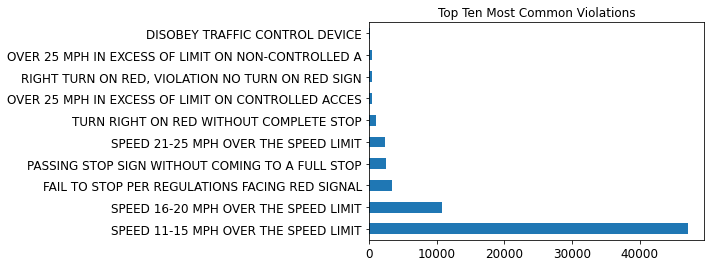

In [34]:
df['VIOLATION_PROCESS_DESC'].value_counts()[:10].plot(kind='barh', title='Top Ten Most Common Violations',fontsize=12)


#### TOP TEN MOST FREQUENT VEHICLES INVOLVING IN VIOLATIONS IN D.C AREA

<AxesSubplot:title={'center':'Most common vehicle makes involved in violation'}>

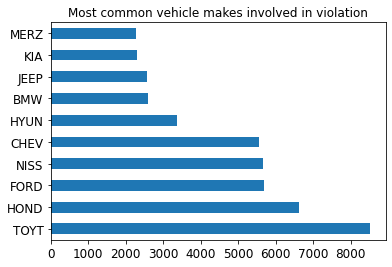

In [35]:
df['VEH_MAKE'].value_counts()[:10].plot(kind='barh',title='Most common vehicle makes involved in violation',fontsize=12)

#### Latitude and Longitude Map for different type of violations in DC

<ipython-input-36-753122de86db>:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


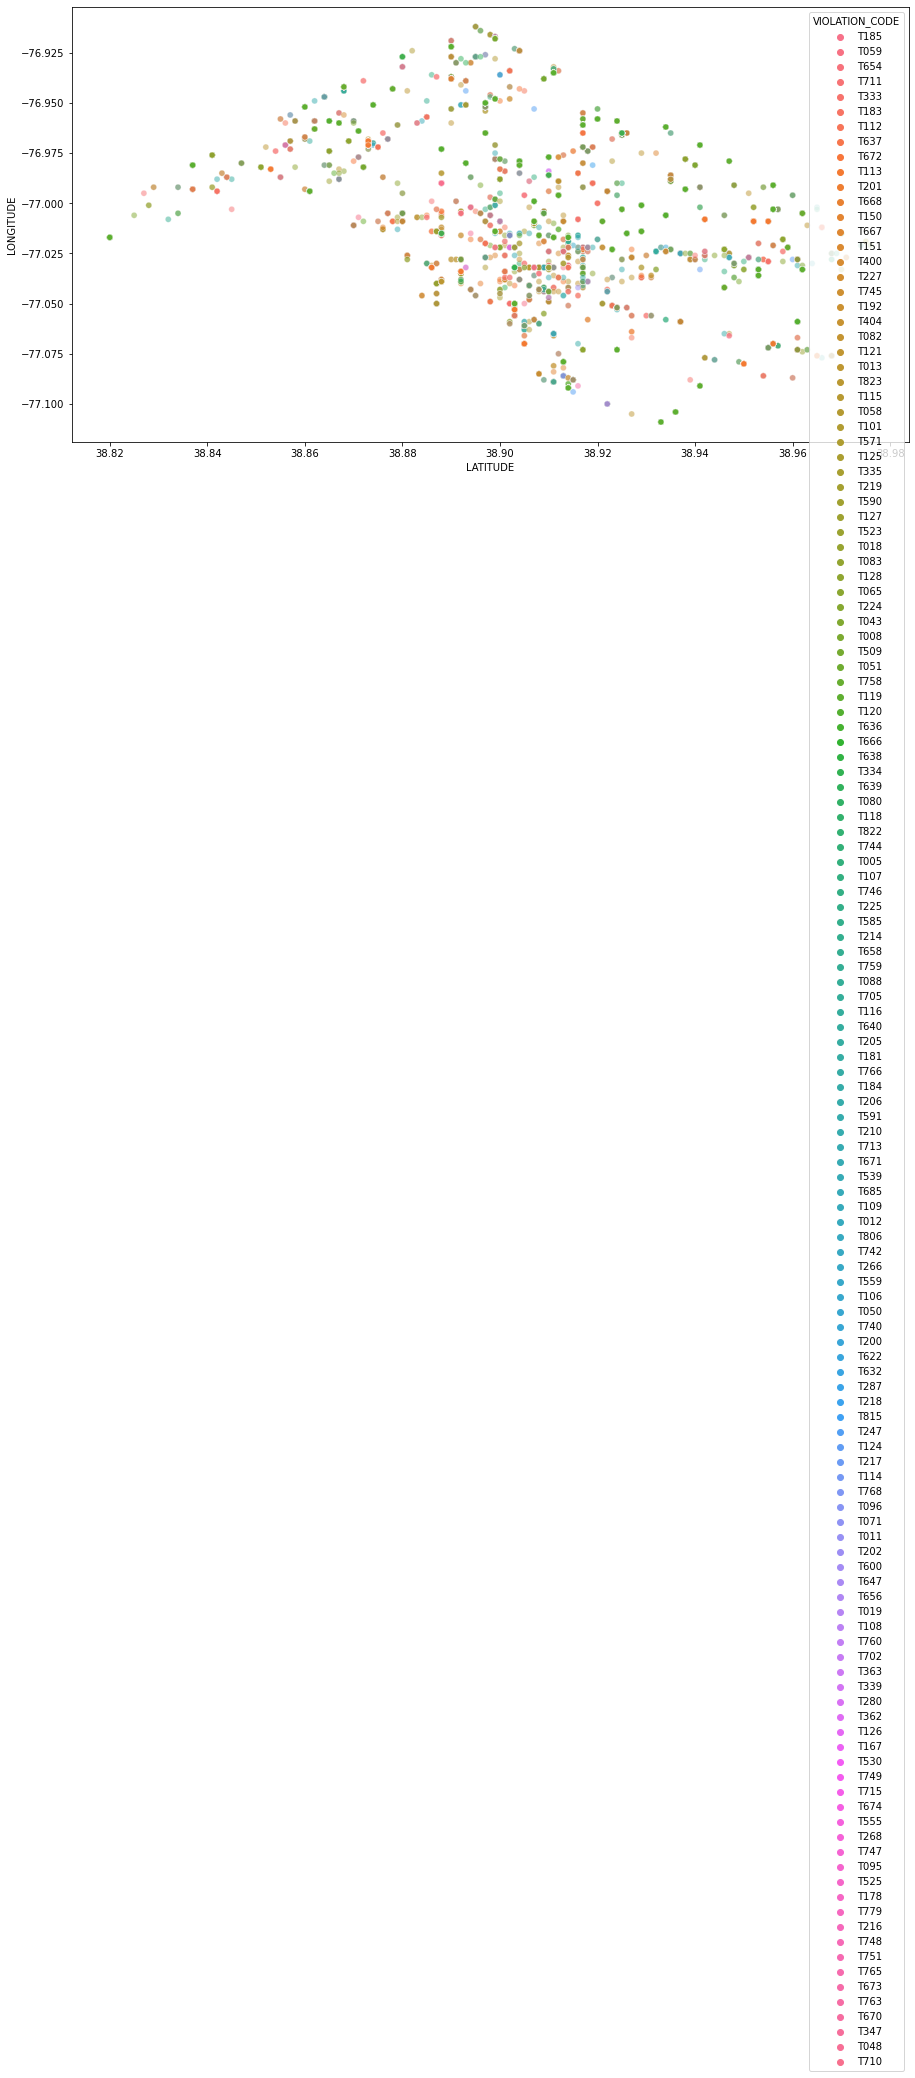

In [36]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x= 'LATITUDE', y = 'LONGITUDE', hue = 'VIOLATION_CODE' , alpha = 0.5)
plt.tight_layout()

#### ONE HOT ENCODING OF CATEGORICAL COLUMNS

In [38]:
df.drop(['OBJECTID','TICKET_NUMBER','ISSUING_AGENCY_CODE','ISSUING_AGENCY_SHORT','VIOLATION_PROCESS_DESC','GIS_LAST_MOD_DTTM','DISPOSITION_TYPE','LATITUDE','LONGITUDE'], axis = 1,inplace = True)

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ACCIDENT_INDICATOR'] = le.fit_transform(df['ACCIDENT_INDICATOR'])
df['VIOLATION_TYPE_DESC'] = le.fit_transform(df['VIOLATION_TYPE_DESC'])

In [40]:
for col in df.columns:
    print(col, ': ',len(df[col].unique()),'labels')

VIOLATION_TYPE_DESC :  2 labels
ISSUING_AGENCY_NAME :  20 labels
VIOLATION_CODE :  136 labels
PLATE_STATE :  43 labels
ACCIDENT_INDICATOR :  2 labels
FINE_AMOUNT :  26 labels
TOTAL_PAID :  16 labels
DRV_LIC_STATE :  47 labels
VEH_MAKE :  235 labels
DUES :  27 labels


In [41]:
df.ISSUING_AGENCY_NAME.value_counts().sort_values(ascending=False).head(20)
top_10_issuing_name = [x for x in df.ISSUING_AGENCY_NAME.value_counts().sort_values(ascending=False).head(10).index]
top_10_issuing_name

['SPECIAL OPERATION DIV & TRAFFIC DIV',
 'METROPOLITAN POLICE DPT-DISTRICT 3',
 'METROPOLITAN POLICE DPT-DISTRICT 2',
 'METROPOLITAN POLICE DPT-DISTRICT 6',
 'METROPOLITAN POLICE DPT-DISTRICT 5',
 'METROPOLITAN POLICE DPT-DISTRICT 1',
 'METROPOLITAN POLICE DPT-DISTRICT 4',
 'UNITED STATES PARK POLICE',
 'METROPOLITAN POLICE DPT-DISTRICT 7',
 'UNITED STATES CAPITOL POLICE']

In [42]:
def one_hot_top(df,variable,top_10_labels):
    for label in top_10_labels:
        df[variable+'_'+label]=np.where(df[variable]==label,1,0)
        
one_hot_top(df,'ISSUING_AGENCY_NAME',top_10_issuing_name)
df.head()

,VIOLATION_TYPE_DESC,ISSUING_AGENCY_NAME,VIOLATION_CODE,PLATE_STATE,ACCIDENT_INDICATOR,FINE_AMOUNT,TOTAL_PAID,DRV_LIC_STATE,VEH_MAKE,DUES,ISSUING_AGENCY_NAME_SPECIAL OPERATION DIV & TRAFFIC DIV,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 3,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 2,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 6,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 5,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 1,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 4,ISSUING_AGENCY_NAME_UNITED STATES PARK POLICE,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 7,ISSUING_AGENCY_NAME_UNITED STATES CAPITOL POLICE
0,1,METROPOLITAN POLICE DPT-DISTRICT 1,T185,VA,1,100,100,VA,HOND,0,0,0,0,0,0,1,0,0,0,0
1,1,UNITED STATES PARK POLICE,T059,TN,1,100,0,FL,NISS,100,0,0,0,0,0,0,0,1,0,0
2,1,UNITED STATES CAPITOL POLICE,T654,VA,1,100,0,VA,VOLV,100,0,0,0,0,0,0,0,0,0,1
3,1,UNITED STATES CAPITOL POLICE,T711,VA,1,500,0,VA,VOLV,500,0,0,0,0,0,0,0,0,0,1
4,1,UNITED STATES CAPITOL POLICE,T333,VA,1,30,0,VA,VOLV,30,0,0,0,0,0,0,0,0,0,1


In [43]:
top_10_violation_code = [x for x in df.VIOLATION_CODE.value_counts().sort_values(ascending=False).head(10).index]
top_10_violation_code

['T119',
 'T120',
 'T113',
 'T128',
 'T121',
 'T334',
 'T822',
 'T202',
 'T823',
 'T112']

In [44]:
one_hot_top(df,'VIOLATION_CODE',top_10_violation_code)
df.head(2)

,VIOLATION_TYPE_DESC,ISSUING_AGENCY_NAME,VIOLATION_CODE,PLATE_STATE,ACCIDENT_INDICATOR,FINE_AMOUNT,TOTAL_PAID,DRV_LIC_STATE,VEH_MAKE,DUES,ISSUING_AGENCY_NAME_SPECIAL OPERATION DIV & TRAFFIC DIV,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 3,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 2,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 6,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 5,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 1,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 4,ISSUING_AGENCY_NAME_UNITED STATES PARK POLICE,ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 7,ISSUING_AGENCY_NAME_UNITED STATES CAPITOL POLICE,VIOLATION_CODE_T119,VIOLATION_CODE_T120,VIOLATION_CODE_T113,VIOLATION_CODE_T128,VIOLATION_CODE_T121,VIOLATION_CODE_T334,VIOLATION_CODE_T822,VIOLATION_CODE_T202,VIOLATION_CODE_T823,VIOLATION_CODE_T112
0,1,METROPOLITAN POLICE DPT-DISTRICT 1,T185,VA,1,100,100,VA,HOND,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,UNITED STATES PARK POLICE,T059,TN,1,100,0,FL,NISS,100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
top_10_plate_state = [x for x in df.PLATE_STATE.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top(df,'PLATE_STATE',top_10_plate_state)

In [46]:
top_10_drv_lcs_state = [x for x in df.DRV_LIC_STATE.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top(df,'DRV_LIC_STATE',top_10_drv_lcs_state)

In [47]:
top_10_veh_make = [x for x in df.VEH_MAKE.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top(df,'VEH_MAKE',top_10_veh_make)

In [48]:
df = df.drop(columns=['ISSUING_AGENCY_NAME','VIOLATION_CODE','PLATE_STATE','DRV_LIC_STATE','VEH_MAKE'])

In [49]:
df.columns

Index(['VIOLATION_TYPE_DESC', 'ACCIDENT_INDICATOR', 'FINE_AMOUNT',
       'TOTAL_PAID', 'DUES',
       'ISSUING_AGENCY_NAME_SPECIAL OPERATION DIV & TRAFFIC DIV',
       'ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 3',
       'ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 2',
       'ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 6',
       'ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 5',
       'ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 1',
       'ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 4',
       'ISSUING_AGENCY_NAME_UNITED STATES PARK POLICE',
       'ISSUING_AGENCY_NAME_METROPOLITAN POLICE DPT-DISTRICT 7',
       'ISSUING_AGENCY_NAME_UNITED STATES CAPITOL POLICE',
       'VIOLATION_CODE_T119', 'VIOLATION_CODE_T120', 'VIOLATION_CODE_T113',
       'VIOLATION_CODE_T128', 'VIOLATION_CODE_T121', 'VIOLATION_CODE_T334',
       'VIOLATION_CODE_T822', 'VIOLATION_CODE_T202', 'VIOLATION_CODE_T823',
       'VIOLATION_CODE_T112', 'PLATE_STA

### Splitting the data into test and train sets

In [50]:
from sklearn.model_selection import train_test_split
def generate_splits():
    y = df['ACCIDENT_INDICATOR']
    X = df[[x for x in df.columns if x != 'ACCIDENT_INDICATOR']]
    
    return train_test_split(X,y,test_size=0.2)

X_train, X_test, y_train, y_test = generate_splits()

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 56,366
Test examples: 14,092


In [51]:
num_pipeline_lr=Pipeline([('standardize_scaler1',StandardScaler()),('lr_classifier',LogisticRegression(random_state=1,penalty='l2',solver='lbfgs',max_iter=1000))])#,random_state=1,solver='sag',max_iter=1000))])
num_pipeline_dt=Pipeline([('standardize_scaler2',StandardScaler()),('dt_classifier',DecisionTreeClassifier())])
num_pipeline_knn=Pipeline([('standardize_scaler2',StandardScaler()),('knn',KNeighborsClassifier())])

### Logistic Regression

In [52]:
param_lr = {'lr_classifier__C':[0.001,0.1, 1, 10]}
gcv_results_lr = GridSearchCV(estimator=num_pipeline_lr, param_grid=param_lr, scoring='accuracy', cv=5)
gcv_results_lr = gcv_results_lr.fit(X_train, y_train)
y_predict=gcv_results_lr.predict(X_test)
print(f'The accuracy when we use logistic regression classifier is {gcv_results_lr.score(X_test,y_test)}')

The accuracy when we use logistic regression classifier is 0.9970195855804712


In [53]:
gcv_results_lr.best_params_

{'lr_classifier__C': 1}

#### Classification Report

In [54]:
predicted_lr = gcv_results_lr.predict(X_test)
print(classification_report(y_test, predicted_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14043
           1       0.64      0.33      0.43        49

    accuracy                           1.00     14092
   macro avg       0.82      0.66      0.72     14092
weighted avg       1.00      1.00      1.00     14092



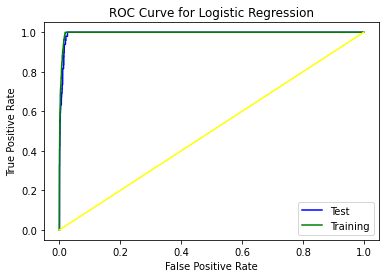

In [55]:
fpr_test, tpr_test,h=roc_curve(y_test, gcv_results_lr.predict_proba(X_test)[:, 1])
fpr_train, tpr_train,l=roc_curve(y_train,gcv_results_lr.predict_proba(X_train)[:, 1])
plt.plot(fpr_test, tpr_test,'-b')
plt.plot(fpr_train, tpr_train,'-g')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='yellow')
plt.show()

### Decision Tree Classifier

In [56]:
param_dt = {'dt_classifier__max_depth':[1,2,3,4]}
gcv_results_dt = GridSearchCV(estimator=num_pipeline_dt, param_grid=param_dt, scoring='accuracy', refit=True, cv=5)
gcv_results_dt = gcv_results_dt.fit(X_train, y_train)
y_predict = gcv_results_dt.predict(X_test)
print(f'The accuracy of decision tree classifier is {gcv_results_dt.score(X_test,y_test)}')

The accuracy of decision tree classifier is 0.9964518875957991


In [57]:
gcv_results_dt.best_params_

{'dt_classifier__max_depth': 3}

In [58]:
predicted_dt = gcv_results_dt.predict(X_test)
print(classification_report(y_test, predicted_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14043
           1       0.00      0.00      0.00        49

    accuracy                           1.00     14092
   macro avg       0.50      0.50      0.50     14092
weighted avg       0.99      1.00      0.99     14092



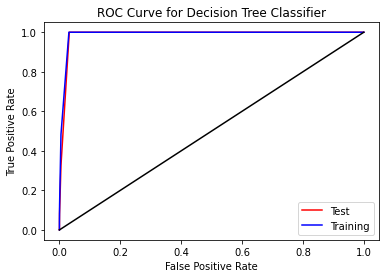

In [59]:
fpr_test, tpr_test,h=roc_curve(y_test, gcv_results_dt.predict_proba(X_test)[:, 1])
fpr_train, tpr_train,l=roc_curve(y_train, gcv_results_dt.predict_proba(X_train)[:, 1])
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='black')
plt.show()

### KNN Classifier

In [60]:
param_knn = {'knn__n_neighbors':[1, 4, 6, 10]}
gcv_results_knn = GridSearchCV(estimator=num_pipeline_knn, param_grid=param_knn, scoring='accuracy', refit=True, cv=5)
gcv_results_knn = gcv_results_knn.fit(X_train, y_train)
y_predict = gcv_results_knn.predict(X_test)
gcv_results_knn.score(X_test,y_test)
print(f'The accuracy of KNN classifier is {gcv_results_knn.score(X_test,y_test)}')

The accuracy of KNN classifier is 0.9965938120919671


In [61]:
gcv_results_knn.best_params_

{'knn__n_neighbors': 10}

In [62]:
predicted_knn = gcv_results_knn.predict(X_test)
print(classification_report(y_test, predicted_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14043
           1       1.00      0.02      0.04        49

    accuracy                           1.00     14092
   macro avg       1.00      0.51      0.52     14092
weighted avg       1.00      1.00      0.99     14092



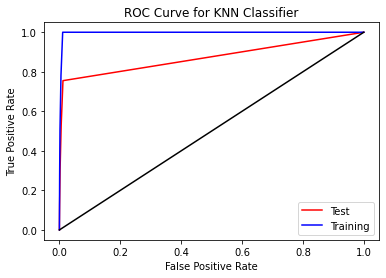

In [63]:
fpr_test, tpr_test,h=roc_curve(y_test, gcv_results_knn.predict_proba(X_test)[:, 1])
fpr_train, tpr_train,l=roc_curve(y_train, gcv_results_knn.predict_proba(X_train)[:, 1])
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.title('ROC Curve for KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='black')
plt.show()

### Conclusion

Out of the three models we designed everything seems to perform in a similar manner while logistic regression having minutely better results compared to others.
The predicter variable and the dataset is highly imbalanced which led to high accuracy scores for our estimations
Through this project I have learned who to do one hot encoding when categorical columns have more number of unique values.
Having a better data in hand we could have done so much more like predicting the age groups of frequent violators or finding the time at which most of the violations are happening etc.
In future we could expand on these ideas but taking in more data with the help of which we can reduce traffic violations across many parts of the country.

